In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
epoch_trial_window = 10

In [3]:
sample_df = pd.read_csv('test_analyze.csv', )
sample_df = sample_df.rename(columns=lambda x: x.strip())

In [4]:
sample_df.shape

(600, 25)

In [5]:
sample_df.columns

Index(['LR_choice', 'value_accuracy', 'value_LR_solution', 'reward',
       'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'high_val_cue',
       'high_p_cue', 'p_accuracy', 'p_LR_solution', 'p_id_solution',
       'id_choice', 'condition', 'trial', 'trialset', 'epoch_n', 'ID',
       'p_id_solution', 'p_t1', 'p_t2', 'epoch_trial'],
      dtype='object')

In [6]:
#zero-based
sample_df.trial = sample_df.trial - 1 
sample_df.epoch_trial = sample_df.epoch_trial - 1 

In [7]:
lag = 2
sample_df['epoch_trial_shifted'] = sample_df.groupby(["ID", "condition", "epoch_n"])['epoch_trial'].transform(lambda x: x-(abs(x-x.max())<lag)*(x.max()+1))
#if < 2 trials from end, then subtract max + 1 from trials; if not do nothing

In [9]:
sample_df_sparse=sample_df.loc[sample_df.epoch_trial_shifted <= epoch_trial_window]

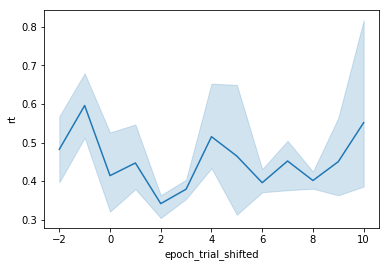

In [10]:
sns.lineplot(sample_df_sparse.epoch_trial_shifted, sample_df_sparse.rt, )

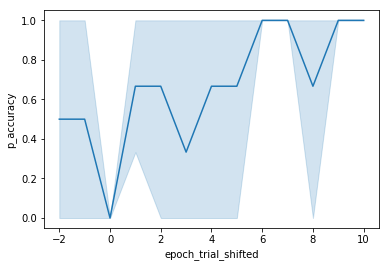

In [11]:
sns.lineplot(sample_df_sparse.epoch_trial_shifted, sample_df_sparse.p_accuracy)